# Logisitic Regression, Linear SVC, Gaussian Naive Bayes

### Reading in the Data

In [76]:
import pipeline as pl
import imp

import pandas as pd
import numpy as np
import random
import time

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
imp.reload(pl)
claims = pl.read_all()

In [78]:
claims.head()

,reimb2010,reimb2008,reimb2009,age2010,male,heart.failure,kidney,cancer,copd,depression,...,acuity,costTrend,monthsWithClaims,race_Black,race_Hispanic,race_Other,race_White,log(reimb2010+1),log(reimb2009+1),log(reimb2008+1)
0,390,320.0,360,97,0,0,0,0,0,0,...,0.235294,-0.018856,9,0,0,0,1,2.592177,2.557507,2.506505
1,970,58800.0,2740,79,0,1,1,0,1,0,...,0.853591,-0.027265,21,0,0,0,1,2.987219,3.437909,4.769385
2,5630,510.0,1580,87,0,1,0,0,0,0,...,0.175115,0.496742,20,0,0,0,1,3.750586,3.198932,2.708421
3,3480,2930.0,49330,79,0,1,1,0,1,1,...,0.709147,0.214955,19,0,0,0,1,3.541704,4.693120,3.467016
4,920,1500.0,1650,85,1,1,0,1,0,0,...,0.174603,0.231568,21,0,0,0,1,2.964260,3.217747,3.176381


### Exploring Data

In [79]:
pl.stats(claims)

Shape of the dataframe is (1023948, 34)


,reimb2010,reimb2008,reimb2009,age2010,male,heart.failure,kidney,cancer,copd,depression,...,acuity,costTrend,monthsWithClaims,race_Black,race_Hispanic,race_Other,race_White,log(reimb2010+1),log(reimb2009+1),log(reimb2008+1)
count,1.023948e+06,1.023948e+06,1.023948e+06,1.023948e+06,1.023948e+06,1.023948e+06,1.023948e+06,1.023948e+06,1.023948e+06,1.023948e+06,...,1.023948e+06,1.023948e+06,1.023948e+06,1.023948e+06,1.023948e+06,1.023948e+06,1.023948e+06,1.023948e+06,1.023948e+06,1.023948e+06
mean,2.843425e+03,4.648829e+03,4.919452e+03,7.318483e+01,4.325093e-01,5.044504e-01,3.157953e-01,1.277887e-01,2.612935e-01,3.942524e-01,...,3.751325e-01,8.071224e-02,1.449090e+01,9.944743e-02,2.229312e-02,3.869044e-02,8.395690e-01,2.655579e+00,2.938725e+00,2.728052e+00
std,5.959795e+03,1.043017e+04,8.954888e+03,1.237868e+01,4.954243e-01,4.999804e-01,4.648321e-01,3.338546e-01,4.393397e-01,4.886898e-01,...,2.586138e-01,2.073680e-01,8.070300e+00,2.992620e-01,1.476352e-01,1.928562e-01,3.670055e-01,1.248806e+00,1.260245e+00,1.362160e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.166667e-02,-7.627773e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.400000e+02,2.800000e+02,5.700000e+02,6.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.841004e-01,-4.075997e-02,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.382017e+00,2.756636e+00,2.448706e+00
50%,1.120000e+03,1.350000e+03,2.020000e+03,7.400000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.049738e-01,7.135935e-02,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.049606e+00,3.305566e+00,3.130655e+00
75%,2.620000e+03,3.800000e+03,4.970000e+03,8.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,5.272727e-01,2.390716e-01,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.418467e+00,3.696444e+00,3.579898e+00
max,1.605000e+05,2.307700e+05,1.870700e+05,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,8.179267e-01,2.400000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.205478e+00,5.272006e+00,5.363181e+00


In [80]:
claims.columns

Index(['reimb2010', 'reimb2008', 'reimb2009', 'age2010', 'male',
       'heart.failure', 'kidney', 'cancer', 'copd', 'depression', 'diabetes',
       'ihd', 'osteoporosis', 'arthritis', 'stroke', 'InpatientClaims',
       'OutpatientClaims', 'OfficeVisit', 'EyeExam', 'EKG', 'xray', 'CTScan',
       'PhysicalTherapy', 'Ambulance', 'acuity', 'costTrend',
       'monthsWithClaims', 'race_Black', 'race_Hispanic', 'race_Other',
       'race_White', 'log(reimb2010+1)', 'log(reimb2009+1)',
       'log(reimb2008+1)'],
      dtype='object')

### Pre-Processing Data

We will be trying OfficeVisit, costTrend, InpatientClaims, OutpatientClaims, age2010, reimb2009, reimb2008, heart.failure, and kidney as features to predict the outcome variable, which is reimb2010.

In [81]:
df = claims[['reimb2010', 'OfficeVisit', 'costTrend', 'reimb2009', 'InpatientClaims', 'OutpatientClaims']]

In [82]:
#fill missing columns
pl.fill_all_missing(df)

/Users/kellyyang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [157]:
df_sample = df.copy()
df_sample['Cost'] = np.where(df_sample['reimb2010'] > 2620, 1, 0) #Cost as a binary variable
#2620 is the threshold at which 75% of medicare patients spend less than, and how we categorize a high cost
#high cost is value 1, low cost is value 0
df_sample = df_sample.drop(['reimb2010'], axis = 1)

In [158]:
train, test = pl.train_test(df_sample, 0.2)

In [159]:
#normalize feature columns
train_df, test_df = pl.normalize(train, test, ['OfficeVisit', 'costTrend', 'reimb2009', 'InpatientClaims', 'OutpatientClaims'])

In [160]:
# Config: Dictionaries of models and hyperparameters - taken from class assignment
MODELS = {
    'LogisticRegression': LogisticRegression(), 
    'LinearSVC': LinearSVC(), 
    'GaussianNB': GaussianNB()
}

GRID = {
    'LogisticRegression': [{'penalty': x, 'C': y, 'random_state': 0} 
                           for x in ('l2', 'none') \
                           for y in (0.01, 0.1, 1, 10, 100)],
    'GaussianNB': [{'priors': None}],
    'LinearSVC': [{'C': x, 'random_state': 0} \
                  for x in (0.01, 0.1, 1, 10, 100)]
}

In [87]:
results = pl.grid_search(train_df, test_df, MODELS, GRID, 'Cost')

Training model: LogisticRegression | {'penalty': 'l2', 'C': 0.01, 'random_state': 0}
Training model: LogisticRegression | {'penalty': 'l2', 'C': 0.1, 'random_state': 0}
Training model: LogisticRegression | {'penalty': 'l2', 'C': 1, 'random_state': 0}
Training model: LogisticRegression | {'penalty': 'l2', 'C': 10, 'random_state': 0}
Training model: LogisticRegression | {'penalty': 'l2', 'C': 100, 'random_state': 0}
Training model: LogisticRegression | {'penalty': 'none', 'C': 0.01, 'random_state': 0}


/Users/kellyyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Training model: LogisticRegression | {'penalty': 'none', 'C': 0.1, 'random_state': 0}


/Users/kellyyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Training model: LogisticRegression | {'penalty': 'none', 'C': 1, 'random_state': 0}
Training model: LogisticRegression | {'penalty': 'none', 'C': 10, 'random_state': 0}


/Users/kellyyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Training model: LogisticRegression | {'penalty': 'none', 'C': 100, 'random_state': 0}


/Users/kellyyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Training model: LinearSVC | {'C': 0.01, 'random_state': 0}
Training model: LinearSVC | {'C': 0.1, 'random_state': 0}
Training model: LinearSVC | {'C': 1, 'random_state': 0}


/Users/kellyyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training model: LinearSVC | {'C': 10, 'random_state': 0}


/Users/kellyyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training model: LinearSVC | {'C': 100, 'random_state': 0}


/Users/kellyyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training model: GaussianNB | {'priors': None}
Time Elapsed: 0:14:56.287012


In [161]:
sorted_results = results.sort_values(by=['Recall Score', 'Accuracy Score'], ascending = False)
sorted_results

,Model,Parameters,Accuracy Score,Precision Score,Recall Score,F1 Score
15,GaussianNB,{'priors': None},0.747151,0.493946,0.337585,0.401064
3,LogisticRegression,"{'penalty': 'l2', 'C': 10, 'random_state': 0}",0.761981,0.560530,0.235493,0.331651
4,LogisticRegression,"{'penalty': 'l2', 'C': 100, 'random_state': 0}",0.761981,0.560530,0.235493,0.331651
5,LogisticRegression,"{'penalty': 'none', 'C': 0.01, 'random_state': 0}",0.761981,0.560530,0.235493,0.331651
6,LogisticRegression,"{'penalty': 'none', 'C': 0.1, 'random_state': 0}",0.761981,0.560530,0.235493,0.331651
7,LogisticRegression,"{'penalty': 'none', 'C': 1, 'random_state': 0}",0.761981,0.560530,0.235493,0.331651
8,LogisticRegression,"{'penalty': 'none', 'C': 10, 'random_state': 0}",0.761981,0.560530,0.235493,0.331651
9,LogisticRegression,"{'penalty': 'none', 'C': 100, 'random_state': 0}",0.761981,0.560530,0.235493,0.331651
1,LogisticRegression,"{'penalty': 'l2', 'C': 0.1, 'random_state': 0}",0.761981,0.560536,0.235474,0.331633
2,LogisticRegression,"{'penalty': 'l2', 'C': 1, 'random_state': 0}",0.761976,0.560510,0.235474,0.331629


In [162]:
x_train = train_df[['OfficeVisit', 'costTrend', 'reimb2009', 'InpatientClaims', 'OutpatientClaims']]
x_test = test_df[['OfficeVisit', 'costTrend', 'reimb2009', 'InpatientClaims', 'OutpatientClaims']]
y_train = train_df[['Cost']]
y_test = test_df[['Cost']]

In [163]:
#most important feature in the model that yielded the highest recall score
from sklearn.inspection import permutation_importance #Gaussian NB does not have a built-in feature importances
#Permutation Importance can be used to determine feature importance from NB
model_NB = GaussianNB()
best_NB = model_NB.fit(x_train, y_train)
features = x.columns.values

importance_NB = permutation_importance(best_NB, x_test, y_test)
features_NB = {}
for i, v in enumerate(importance_NB.importances_mean):
    features_NB[features[i]] = v

/Users/kellyyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<AxesSubplot:>

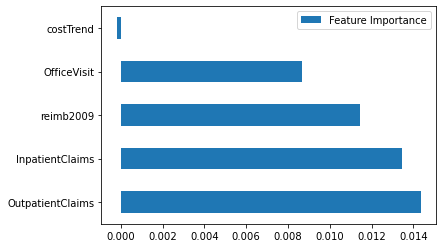

In [170]:
df_NB = pd.DataFrame.from_dict(features_NB, orient = 'index', columns = ['Feature Importance'])
df_NB = df_NB.sort_values(by = ['Feature Importance'], ascending = False)

df_NB.plot.barh() #plot permutation importances for NB

In [166]:
#highest accuracy scores
sorted_results2 = results.sort_values(by=['Accuracy Score', 'Recall Score'], ascending = False)
sorted_results2.head(3)

,Model,Parameters,Accuracy Score,Precision Score,Recall Score,F1 Score
13,LinearSVC,"{'C': 10, 'random_state': 0}",0.762239,0.56487,0.225933,0.322767
3,LogisticRegression,"{'penalty': 'l2', 'C': 10, 'random_state': 0}",0.761981,0.56053,0.235493,0.331651
4,LogisticRegression,"{'penalty': 'l2', 'C': 100, 'random_state': 0}",0.761981,0.56053,0.235493,0.331651


In [167]:
sorted_results2['Parameters'][13]

"{'C': 10, 'random_state': 0}"

In [168]:
#most important feature in the model that yielded the highest accuracy score
model_SVC = LinearSVC()
SVC_params = {'C': 10, 'random_state': 0}
model_SVC.set_params(**SVC_params)
best_SVC = model_SVC.fit(x_train, y_train)

importance_SVC = model_SVC.coef_[0]
features_SVC = {}
for i, v in enumerate(importance_SVC):
    features_SVC[features[i]] = v

/Users/kellyyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/kellyyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'Feature')

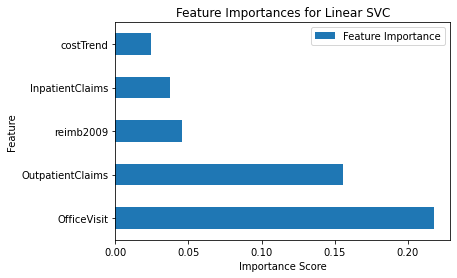

In [178]:
df_SVC = pd.DataFrame.from_dict(features_SVC, orient = 'index', columns = ['Feature Importance'])
df_SVC = df_SVC.sort_values(by = ['Feature Importance'], ascending = False)

df_SVC.plot.barh()
plt.title('Feature Importances for Linear SVC')
plt.xlabel('Importance Score')
plt.ylabel('Feature')